In [11]:
import os
from loguru import logger
from federated_learning.arguments import Arguments
from federated_learning.dimensionality_reduction import calculate_pca_of_gradients
from federated_learning.parameters import get_layer_parameters
from federated_learning.parameters import calculate_parameter_gradients
from federated_learning.utils import get_model_files_for_epoch
from federated_learning.utils import get_model_files_for_suffix
from federated_learning.utils import apply_standard_scaler
from federated_learning.utils import get_poisoned_worker_ids_from_log
from federated_learning.utils import get_worker_num_from_model_file_name
from client import Client
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

%matplotlib inline


args = Arguments(logger)
args.log() 

SAVE_SIZE = (18, 14)

MODELS_PATH = '../DataPoisoning_FL/results/Nz_FMNIST_6/NzFMNIST_6_2010_models/'
EXP_INFO_PATH = '../DataPoisoning_FL/results/Nz_FMNIST_6/logs/NzFMNIST_6_2010.log'

EPOCHS = list(range(10, 200))
LAYER_NAME = "fc.weight"

CLASS_NUM = 1
POISONED_WORKER_IDS = get_poisoned_worker_ids_from_log(EXP_INFO_PATH, line_num=32)
MODEL_FILES = sorted(os.listdir(MODELS_PATH))

SAVE_NAME = "defense_results.jpg"
SAVE_SIZE = (18, 14)

2020-11-30 14:55:22.294 | DEBUG    | federated_learning.arguments:log:193 - Arguments: 
Batch Size: 4
Test Batch Size: 1000
Epochs: 200
Learning Rate: 0.001
Momentum: 0.9
CUDA Enabled: False
Shuffle Enabled: False
Log Interval: 100
Scheduler Step Size: 10
Scheduler Gamma: 0.1
Scheduler Minimum Learning Rate: 1e-10
Client Selection Strategy: None
Client Selection Strategy Arguments: null
Model Saving Enabled: True
Model Saving Interval: 1
Model Saving Path (Relative): models
Epoch Save Start Prefix: start
Epoch Save End Suffix: end
Number of Clients: 20
Number of Poisoned Clients: 10
NN: <class 'federated_learning.nets.fashion_mnist_cnn.FashionMNISTCNN'>
Train Data Loader Path: data_loaders/fashion-mnist/train_data_loader.pickle
Test Data Loader Path: data_loaders/fashion-mnist/test_data_loader.pickle
Loss Function: <class 'torch.nn.modules.loss.CrossEntropyLoss'>
Default Model Folder Path: default_models
Data Path: data



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


In [13]:
def load_models(args, model_filenames):
    clients = []
    for model_filename in model_filenames:
        client = Client(args, 0, None, None)
        client.set_net(client.load_model_from_file(model_filename))

        clients.append(client)

    return clients

def plot_gradients_2d(gradients):
    fig = plt.figure()

    for (worker_id, gradient) in gradients:
        if worker_id in POISONED_WORKER_IDS:
            plt.scatter(gradient[0], gradient[1], color="blue", s=100)
        else:
            plt.scatter(gradient[0], gradient[1], color="orange", s=180)
    
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Poisoned', markerfacecolor='blue', markersize=15),
               Line2D([0], [0], marker='o', color='w', label='Benign', markerfacecolor='orange', markersize=15)
              ]
    fig.set_size_inches(SAVE_SIZE, forward=False)
    fig.legend(handles=legend_elements, loc='upper right')
    plt.grid(False)
    plt.margins(0,0)
    


    # Create the figure
    fig, ax = plt.subplots()
    
#     plt.legend()
    plt.savefig(SAVE_NAME, bbox_inches='tight', pad_inches=0.1)
    plt.title('Noise FMNIST - Class 6 | Blue : Malicious | Orange : Benign')

2020-11-30 15:15:17.143 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:17.146 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:17.154 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:17.156 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:17.163 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:17.164 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:17.179 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:17.183 | WARNI

2020-11-30 15:15:17.527 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:17.535 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:17.536 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:17.551 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:17.554 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:17.561 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:17.561 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:17.905 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:17.906 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:17.921 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:17.924 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:17.929 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:17.929 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:17.944 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:18.247 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:18.250 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:18.263 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:18.266 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:18.272 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:18.272 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:18.287 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:18.290 | WARNI

2020-11-30 15:15:18.581 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:18.587 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:18.588 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:18.601 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:18.603 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:18.608 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:18.609 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:19.052 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:19.053 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:19.067 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:19.070 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:19.079 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:19.080 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:19.094 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:19.393 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:19.395 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:19.403 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:19.406 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:19.411 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:19.412 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:19.427 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:19.430 | WARNI

2020-11-30 15:15:19.749 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:19.754 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:19.754 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:19.767 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:19.769 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:19.774 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:19.775 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:20.067 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:20.067 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:20.080 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:20.082 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:20.090 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:20.091 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:20.105 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:20.441 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:20.443 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:20.450 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:20.453 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:20.458 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:20.459 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:20.473 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:20.475 | WARNI

2020-11-30 15:15:20.755 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:20.760 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:20.761 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:20.780 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:20.783 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:20.789 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:20.790 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:21.173 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:21.174 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:21.191 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:21.194 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:21.200 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:21.201 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:21.217 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:21.565 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:21.569 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:21.579 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:21.582 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:21.590 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:21.591 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:21.607 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:21.610 | WARNI

2020-11-30 15:15:22.019 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:22.029 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:22.030 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:22.051 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:22.055 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:22.065 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:22.066 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:22.450 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:22.452 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:22.479 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:22.482 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:22.488 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:22.489 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:22.505 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:22.879 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:22.883 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:22.893 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:22.896 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:22.903 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:22.904 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:22.920 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:22.923 | WARNI

2020-11-30 15:15:23.234 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:23.243 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:23.243 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:23.257 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:23.259 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:23.265 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:23.265 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:23.609 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:23.609 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:23.623 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:23.627 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:23.632 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:23.633 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:23.648 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:24.029 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:24.031 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:24.040 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:24.042 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:24.048 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:24.048 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:24.062 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:24.065 | WARNI

2020-11-30 15:15:24.366 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:24.372 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:24.372 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:24.389 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:24.392 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:24.398 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:24.399 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:24.738 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:24.739 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:24.753 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:24.756 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:24.762 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:24.762 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:24.777 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:25.094 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:25.096 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:25.104 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:25.107 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:25.113 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:25.113 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:25.128 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:25.131 | WARNI

2020-11-30 15:15:25.497 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:25.503 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:25.503 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:25.516 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:25.519 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:25.524 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:25.525 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:25.845 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:25.846 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:25.862 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:25.865 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:25.871 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:25.872 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:25.886 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:26.233 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:26.236 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:26.243 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:26.245 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:26.251 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:26.251 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:26.267 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:26.270 | WARNI

2020-11-30 15:15:26.545 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:26.550 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:26.551 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:26.563 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:26.565 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:26.570 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:26.571 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:26.938 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:26.938 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:26.953 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:26.956 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:26.962 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:26.963 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:26.984 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:27.258 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:27.260 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:27.268 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:27.270 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:27.275 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:27.276 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:27.289 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:27.292 | WARNI

2020-11-30 15:15:27.576 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:27.582 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:27.582 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:27.595 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:27.598 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:27.604 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:27.604 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:27.895 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:27.895 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:27.908 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:27.911 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:27.916 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:27.917 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:27.930 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:28.205 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:28.207 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:28.215 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:28.217 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:28.223 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:28.223 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:28.237 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:28.240 | WARNI

2020-11-30 15:15:28.600 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:28.604 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:28.605 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:28.621 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:28.624 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:28.631 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:28.632 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:28.913 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:28.914 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:28.926 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:28.928 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:28.933 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:28.934 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:28.949 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:29.232 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:29.234 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:29.241 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:29.244 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:29.249 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:29.249 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:29.263 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:29.265 | WARNI

2020-11-30 15:15:29.536 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:29.541 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:29.542 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:29.554 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:29.556 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:29.561 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:29.562 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:29.957 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:29.958 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:29.971 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:29.973 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:29.978 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:29.979 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:29.992 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:30.269 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:30.271 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:30.278 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:30.280 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:30.286 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:30.287 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:30.301 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:30.303 | WARNI

2020-11-30 15:15:30.616 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:30.621 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:30.622 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:30.635 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:30.638 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:30.642 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:30.643 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:30.981 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:30.981 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:30.996 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:30.999 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:31.008 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:31.009 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:31.039 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:31.425 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:31.428 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:31.436 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:31.438 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:31.444 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:31.445 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:31.459 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:31.461 | WARNI

2020-11-30 15:15:31.740 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:31.746 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:31.746 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:31.759 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:31.761 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:31.765 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:31.766 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:32.103 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:32.104 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:32.118 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:32.120 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:32.126 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:32.127 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:32.141 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:32.477 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:32.480 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:32.489 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:32.492 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:32.498 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:32.499 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:32.513 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:32.516 | WARNI

2020-11-30 15:15:32.884 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:32.889 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:32.890 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:32.905 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:32.908 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:32.914 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:32.915 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:33.274 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:33.275 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:33.289 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:33.292 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:33.299 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:33.299 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:33.316 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:33.664 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:33.666 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:33.674 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:33.676 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:33.682 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:33.683 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:33.698 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:33.700 | WARNI

2020-11-30 15:15:34.024 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:34.030 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:34.031 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:34.045 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:34.047 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:34.053 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:34.054 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:34.472 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:34.472 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:34.488 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:34.490 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:34.496 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:34.497 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:34.511 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:34.905 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:34.908 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:34.916 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:34.919 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:34.925 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:34.926 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:34.943 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:34.947 | WARNI

2020-11-30 15:15:35.372 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:35.384 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:35.385 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:35.402 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:35.404 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:35.411 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:35.411 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:35.791 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:35.792 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:35.828 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:35.846 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:35.858 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:35.860 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:35.886 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:36.304 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:36.307 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:36.316 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:36.318 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:36.324 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:36.325 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:36.341 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:36.343 | WARNI

2020-11-30 15:15:36.682 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:36.689 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:36.690 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:36.706 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:36.709 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:36.715 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:36.715 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:37.081 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:37.081 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:37.109 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:37.113 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:37.118 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:37.119 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:37.132 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:37.407 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:37.409 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:37.417 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:37.419 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:37.424 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:37.425 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:37.438 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:37.440 | WARNI

2020-11-30 15:15:37.708 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:37.714 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:37.714 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:37.727 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:37.729 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:37.789 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:37.789 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:38.065 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:38.065 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:38.077 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:38.079 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:38.084 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:38.084 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:38.096 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:38.394 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:38.397 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:38.403 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:38.406 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:38.411 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:38.412 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:38.424 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:38.426 | WARNI

2020-11-30 15:15:38.703 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:38.708 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:38.708 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:38.720 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:38.722 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:38.727 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:38.728 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:39.007 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:39.007 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:39.019 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:39.022 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:39.027 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:39.028 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:39.041 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:39.362 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:39.364 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:39.371 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:39.373 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:39.378 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:39.378 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:39.391 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:39.393 | WARNI

2020-11-30 15:15:39.642 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:39.647 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:39.648 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:39.660 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:39.662 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:39.668 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:39.668 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:39.960 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:39.960 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:39.972 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:39.974 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:39.978 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:39.979 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:39.991 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:40.243 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:40.245 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:40.253 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:40.255 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:40.260 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:40.260 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:40.273 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:40.276 | WARNI

2020-11-30 15:15:40.594 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:40.598 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:40.599 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:40.611 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:40.613 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:40.618 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:40.619 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:40.903 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:40.903 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:40.917 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:40.920 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:40.927 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:40.927 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:40.952 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:41.316 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:41.319 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:41.328 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:41.331 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:41.337 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:41.338 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:41.354 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:41.357 | WARNI

2020-11-30 15:15:41.762 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:41.769 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:41.770 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:41.785 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:41.787 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:41.792 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:41.793 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:42.156 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:42.157 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:42.170 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:42.172 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:42.177 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:42.178 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:42.191 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

2020-11-30 15:15:42.451 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:42.453 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:42.460 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:42.462 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:42.467 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:42.468 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:42.480 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:42.482 | WARNI

2020-11-30 15:15:42.752 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:42.757 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:42.757 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:42.770 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:42.772 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:42.776 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:42.777 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 15

2020-11-30 15:15:43.058 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:43.058 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:43.070 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15:15:43.072 | WARNING  | client:load_model_from_file:84 - Couldn't load model. Attempting to map CUDA tensors to CPU to solve error.
2020-11-30 15:15:43.079 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:24 - Shape of model_1_parameters: 1568
2020-11-30 15:15:43.079 | DEBUG    | federated_learning.parameters.gradients:calculate_parameter_gradients:25 - Shape of model_2_parameters: 1568
2020-11-30 15:15:43.094 | WARNING  | client:load_model_from_file:88 - Could not find model: default_models/FashionMNISTCNN.model
2020-11-30 15

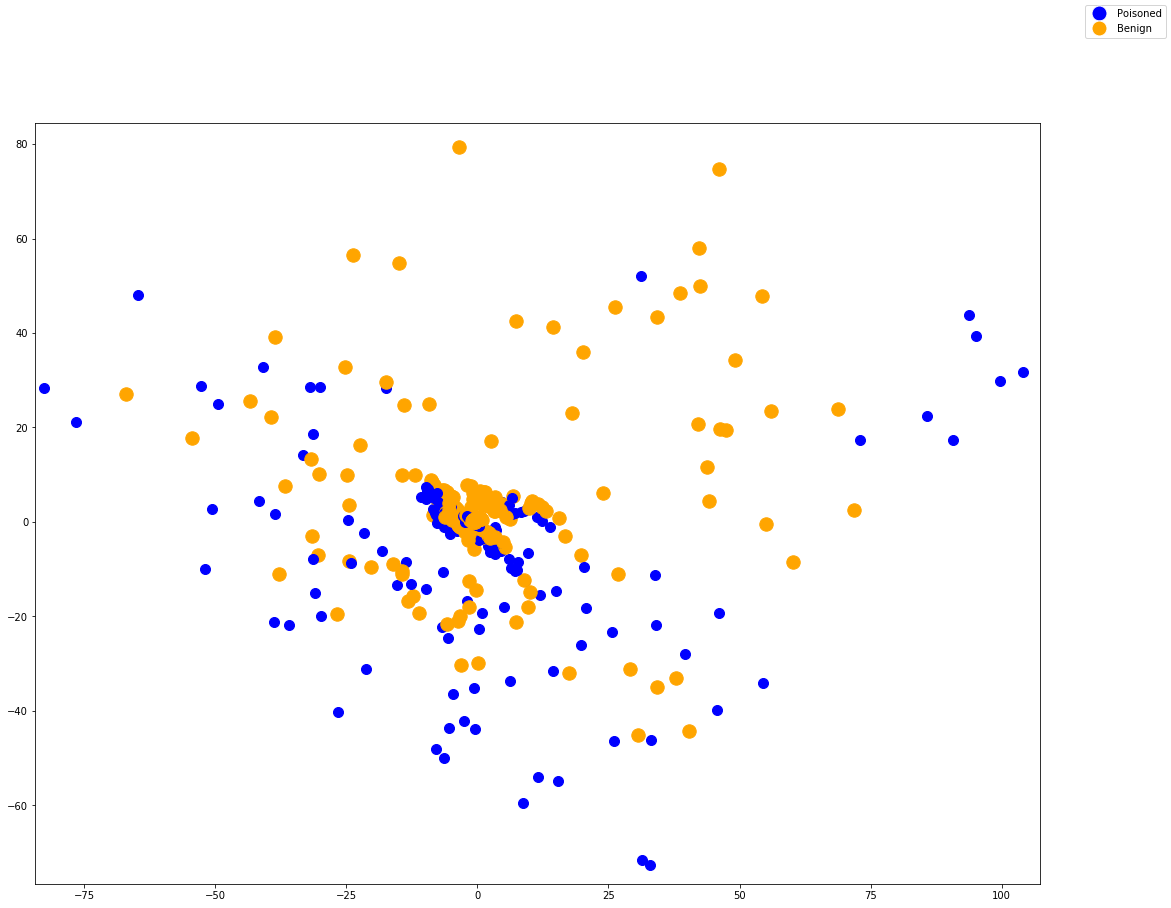

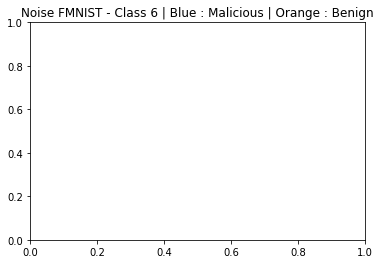

In [16]:
param_diff = []
worker_ids = []
l2_norms = []
for epoch in EPOCHS:
    start_model_files = get_model_files_for_epoch(MODEL_FILES, epoch)
    start_model_file = get_model_files_for_suffix(start_model_files, args.get_epoch_save_start_suffix())[0]
    start_model_file = os.path.join(MODELS_PATH, start_model_file)
    start_model = load_models(args, [start_model_file])[0]
    start_model_layer_param = list(get_layer_parameters(start_model.get_nn_parameters(), LAYER_NAME)[CLASS_NUM])
    
    end_model_files = get_model_files_for_epoch(MODEL_FILES, epoch)
    end_model_files = get_model_files_for_suffix(end_model_files, args.get_epoch_save_end_suffix())
    
    for end_model_file in end_model_files:
        worker_id = get_worker_num_from_model_file_name(end_model_file)
        end_model_file = os.path.join(MODELS_PATH, end_model_file)
        end_model = load_models(args, [end_model_file])[0]
        
        end_model_layer_param = list(get_layer_parameters(end_model.get_nn_parameters(), LAYER_NAME)[CLASS_NUM])
        
        gradient  = calculate_parameter_gradients(logger, start_model_layer_param, end_model_layer_param)
        gradient = gradient.flatten()
        
        l2_norm = sum([item**2 for item in gradient])
        
        l2_norms.append(l2_norm)
        param_diff.append(gradient)
        worker_ids.append(worker_id)
    
    

# logger.info("Gradients shape: ({}, {})".format(len(param_diff), param_diff[0].shape[0]))

# logger.info("Prescaled gradients: {}".format(str(param_diff)))
scaled_param_diff = apply_standard_scaler(param_diff)
# logger.info("Postscaled gradients: {}".format(str(scaled_param_diff)))
dim_reduced_gradients = calculate_pca_of_gradients(logger, scaled_param_diff, 2)
# logger.info("PCA reduced gradients: {}".format(str(dim_reduced_gradients)))

# logger.info("Dimensionally-reduced gradients shape: ({}, {})".format(len(dim_reduced_gradients), dim_reduced_gradients[0].shape[0]))

plot_gradients_2d(zip(worker_ids, dim_reduced_gradients))




In [19]:
ggds = zip(worker_ids, l2_norms)

In [20]:
for (worker_id, gradient) in ggds:
    if worker_id in POISONED_WORKER_IDS:
        print("---", gradient)
    else:
        print(gradient)

--- 0.010333902487327169
--- 0.01188283684480255
--- 0.015263478368284272
0.011387529557390173
0.010656388765280246
0.011169143088048871
--- 0.010323606163643605
0.013410624702292994
--- 0.009728195770258708
0.009965933486270746
--- 0.014145388311055523
0.009805288371578035
--- 0.010241160912606486
0.011180185062164933
0.010596522318792236
--- 0.01837323435365812
--- 0.014599825724399267
--- 0.010973863822777132
0.01030523646839162
0.009013300728301714
--- 0.013320238621687738
--- 0.012450795219344985
--- 0.011719155865565364
--- 0.010761085607388768
0.010986274155844642
--- 0.010313580564889152
--- 0.015512593476059053
0.012375735028777576
0.009291620180606973
0.010599396308386017
--- 0.013382906990180249
--- 0.00969014119575591
--- 0.010138132228498204
--- 0.009684421499435913
0.011346447128963752
--- 0.0074186616998056076
--- 0.016649107229250962
0.008633952904132124
--- 0.006669242491746692
--- 0.005885376850242753
0.004573057516339759
--- 0.013059748909120957
--- 0.011680400378296